In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Parte 1

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

In [18]:
# Funcion para comparar la imagen original con la modificada
def comparar_imagenes(img1, img2, optional_title="Modificada"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img1)
    axes[0].axis('off')
    axes[0].set_title('Original')

    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title(optional_title)

    plt.show()

In [44]:
def coordenadas_cromaticas(img):
    new_img = []
    
    # Recorro cada pixel de la imagen
    for row in img:
        new_row = []
        for pixel in row:
            new_pixel = []
            red = pixel[0].astype(float)
            green = pixel[1].astype(float)
            blue = pixel[2].astype(float)
            
            # Sumo los valores de cada canal 
            ch_sum = red + green + blue
            
            # Chequeo si la suma da 0 para que no rompa el denominador
            if (ch_sum == 0):
                new_pixel = [0, 0, 0]
            
            # Divido cada canal por la suma
            else:
                new_pixel = [red/ch_sum, green/ch_sum, blue/ch_sum]

            new_row.append(new_pixel)
        
        new_img.append(new_row)

    # Observo los resultados
    comparar_imagenes(img, new_img, "Luego de aplicar coordenadas cromaticas")

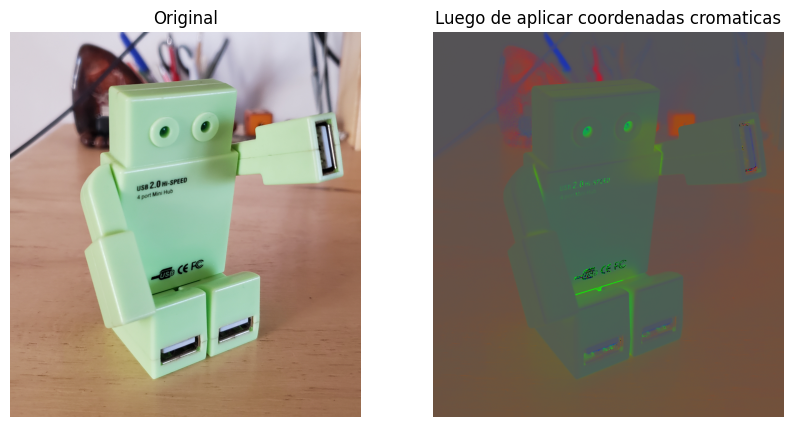

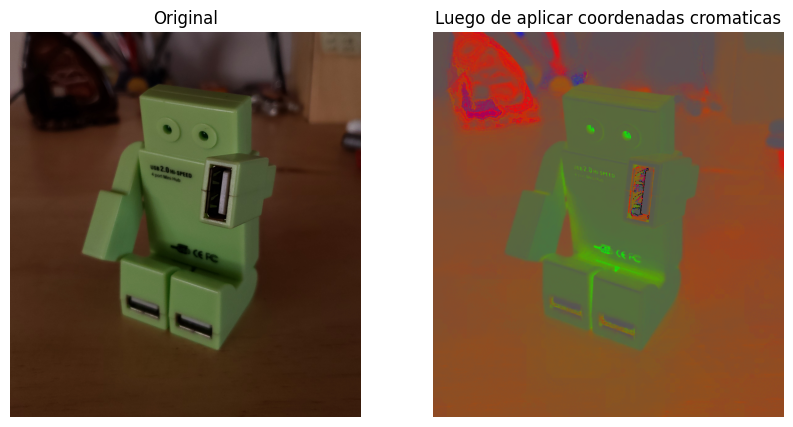

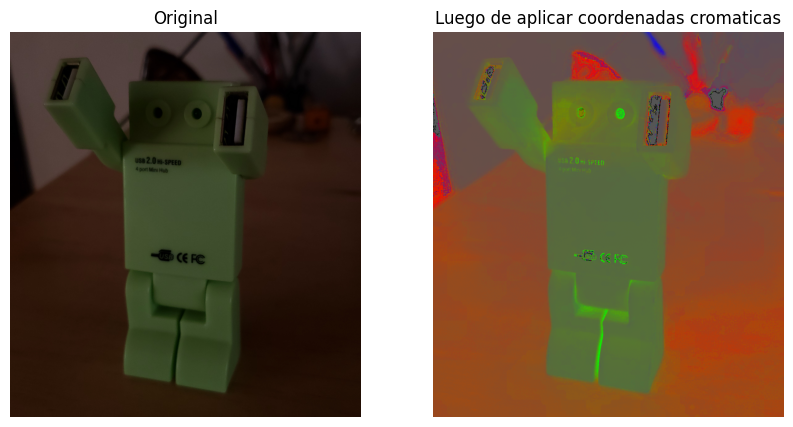

In [46]:
img1 = cv.cvtColor(cv.imread('coord_cromaticas/CoordCrom_1.png'), cv.COLOR_BGR2RGB)
coordenadas_cromaticas(img1)

img2 = cv.cvtColor(cv.imread('coord_cromaticas/CoordCrom_2.png'), cv.COLOR_BGR2RGB)
coordenadas_cromaticas(img2)

img3 = cv.cvtColor(cv.imread('coord_cromaticas/CoordCrom_3.png'), cv.COLOR_BGR2RGB)
coordenadas_cromaticas(img3)

In [72]:
def white_patch(img):
    new_img = []

    # Obtengo el maximo valor para cada canal
    channels = cv.split(img)
    red_max = np.max(channels[0])
    green_max = np.max(channels[1])
    blue_max = np.max(channels[2])

    print(red_max, green_max, blue_max)

    # Si el maximo es 255 utilizo el percentil 95
    if red_max == 255:
        red_max = np.percentile(channels[0], 95)
    if green_max == 255:
        green_max = np.percentile(channels[1], 95)
    if blue_max == 255:
        blue_max = np.percentile(channels[2], 95)
    
    # Recorro cada pixel de la imagen
    for row in img:
        new_row = []
        for pixel in row:
            new_pixel = []
            red = pixel[0].astype(float)
            green = pixel[1].astype(float)
            blue = pixel[2].astype(float)
            
            # Normalizamos al color de la luz blanca
            new_pixel = [red*255/red_max, green*255/green_max, blue*255/blue_max]
            new_pixel[0] = np.round(new_pixel[0],0).astype(np.uint8)
            new_pixel[1] = np.round(new_pixel[1],0).astype(np.uint8)
            new_pixel[2] = np.round(new_pixel[2],0).astype(np.uint8)

            new_row.append(new_pixel)
        
        new_img.append(new_row)

    # Observo los resultados
    comparar_imagenes(img, new_img, "Luego de aplicar white patch")

165 138 200


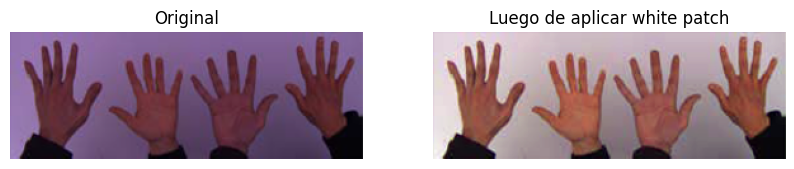

210 250 171


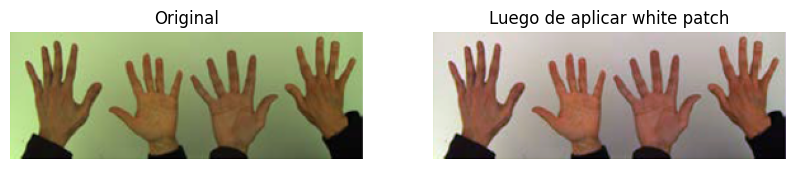

247 157 175


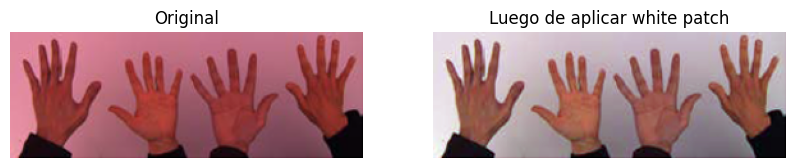

In [74]:
img1 = cv.cvtColor(cv.imread('white_patch/test_blue.png'), cv.COLOR_BGR2RGB)
white_patch(img1)

img2 = cv.cvtColor(cv.imread('white_patch/test_green.png'), cv.COLOR_BGR2RGB)
white_patch(img2)

img3 = cv.cvtColor(cv.imread('white_patch/test_red.png'), cv.COLOR_BGR2RGB)
white_patch(img3)

### Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre aplicando mascaras, las regiones en imágenes separadas.